In [52]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\RISHI RAMAN\Desktop\ml\combined_fraud_data.csv')

In [53]:
print("Shape of combined DataFrame:", df.shape)
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFraud Distribution:")
print(df['TX_FRAUD'].value_counts())
print(f"\nFraud Rate: {df['TX_FRAUD'].mean()*100:.2f}%")

Shape of combined DataFrame: (1754155, 9)
Dataset Shape: (1754155, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRANSACTION_ID     int64  
 1   TX_DATETIME        object 
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 120.4+ MB
None

Fraud Distribution:
TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64

Fraud Rate: 0.84%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRANSACTION_ID     int64  
 1   TX_DATETIME        object 
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 120.4+ MB


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier


df = pd.read_csv(r'C:\Users\RISHI RAMAN\Desktop\ml\combined_fraud_data.csv')
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])  
df['TX_HOUR'] = df['TX_DATETIME'].dt.hour
df['TX_DAY'] = df['TX_DATETIME'].dt.day
df['TX_WEEKDAY'] = df['TX_DATETIME'].dt.weekday

In [6]:
df = df.drop(columns=['TX_DATETIME'])


X = df.drop(columns=['TX_FRAUD'])
y = df['TX_FRAUD']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)


In [9]:
model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,  # Already balanced via under-sampling
    eval_metric="auc",
    use_label_encoder=False,
    random_state=42
)


model.fit(X_resampled, y_resampled)


c:\Users\RISHI RAMAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:02:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [10]:
y_pred = model.predict(X_test_scaled)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("\nRecall (Fraud):", recall_score(y_test, y_pred, pos_label=1))



Confusion Matrix:
 [[347895      0]
 [     0   2936]]

Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    347895
           1     1.0000    1.0000    1.0000      2936

    accuracy                         1.0000    350831
   macro avg     1.0000    1.0000    1.0000    350831
weighted avg     1.0000    1.0000    1.0000    350831


Recall (Fraud): 1.0


In [11]:
import pandas as pd

df = df.rename(columns={
    'TX_FRAUD': 'fraud_class',
    'TX_AMOUNT': 'amount',
    'TX_HOUR': 'hour',
    'TX_DAY': 'day',
    'TX_WEEKDAY': 'weekday'
})



In [12]:
df['time'] = df['TX_TIME_DAYS'] * 86400 + df['TX_TIME_SECONDS']  # in seconds from day 0

df = df.drop(columns=[
    'TRANSACTION_ID',
    'CUSTOMER_ID',
    'TERMINAL_ID',
    'TX_TIME_SECONDS',
    'TX_TIME_DAYS',
    'TX_FRAUD_SCENARIO'  
])


In [13]:
df = df[['fraud_class', 'time', 'amount', 'hour', 'day', 'weekday']]

print(df.head())
print(df.dtypes)

   fraud_class  time  amount  hour  day  weekday
0            0    31   57.16     0    1        6
1            0   130   81.51     0    1        6
2            0   476  146.00     0    1        6
3            0   569   64.49     0    1        6
4            0   634   50.99     0    1        6
fraud_class      int64
time             int64
amount         float64
hour             int32
day              int32
weekday          int32
dtype: object


In [15]:
X = df.drop(columns=['fraud_class'])
y = df['fraud_class']



In [16]:
class_counts = y.value_counts()
neg, pos = class_counts[0], class_counts[1]
scale_pos_weight = neg / pos

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [17]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="auc",
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
model.fit(X_train_scaled, y_train)

c:\Users\RISHI RAMAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:04:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [18]:

y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nRecall Score (Fraud Class):", recall_score(y_test, y_pred))

Confusion Matrix:
 [[318973  28922]
 [  1943    993]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95    347895
           1       0.03      0.34      0.06      2936

    accuracy                           0.91    350831
   macro avg       0.51      0.63      0.51    350831
weighted avg       0.99      0.91      0.95    350831


Recall Score (Fraud Class): 0.33821525885558584


In [17]:
import joblib

# Save the trained model
joblib.dump(model, 'fraud_kaggle.pkl')

print("Model saved as 'fraud_detection_model.pkl'")


Model saved as 'fraud_detection_model.pkl'


In [18]:
# Load the model from file
loaded_model = joblib.load('fraud_kaggle.pkl')

# Example usage
y_pred_loaded = loaded_model.predict(X_test_scaled)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
n_samples = 1000
fraud_ratio = 0.02
n_fraud = int(n_samples * fraud_ratio)
n_legit = n_samples - n_fraud

test_data = {
    "fraud_class": [0] * n_legit + [1] * n_fraud,
    "time": np.random.randint(0, 86400 * 7, size=n_samples),
    "amount": np.random.exponential(scale=100, size=n_samples),
    "hour": np.random.randint(0, 24, size=n_samples),
    "day": np.random.randint(1, 32, size=n_samples),
    "weekday": np.random.randint(0, 7, size=n_samples)
}
df_test = pd.DataFrame(test_data)

df_test = df_test.sample(frac=1, random_state=42).reset_index(drop=True)

X_test = df_test.drop(columns=['fraud_class'])
y_test = df_test['fraud_class']

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

print(df_test.head())


   fraud_class    time      amount  hour  day  weekday
0            0  316837   51.922883     7    9        3
1            0   73686   41.716836    14   24        1
2            0  245121   41.132293     1   13        4
3            0  485450   56.363250     5   26        4
4            0  592673  114.086226    20   15        4


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, recall_score
import joblib

# === Load your saved XGBoost model ===
model = joblib.load("fraud_kaggle.pkl")  # path to your saved model

# === Step 1: Generate synthetic test data ===
np.random.seed(42)
n_samples = 1000
fraud_ratio = 0.02
n_fraud = int(n_samples * fraud_ratio)
n_legit = n_samples - n_fraud

test_data = {
    "fraud_class": [0] * n_legit + [1] * n_fraud,
    "time": np.random.randint(0, 86400 * 7, size=n_samples),
    "amount": np.random.exponential(scale=100, size=n_samples),
    "hour": np.random.randint(0, 24, size=n_samples),
    "day": np.random.randint(1, 32, size=n_samples),
    "weekday": np.random.randint(0, 7, size=n_samples)
}

# "time": np.random.randint(0, 86400 * 7, size=n_samples),
#     "amount": np.random.exponential(scale=100, size=n_samples),
#     "hour": np.random.randint(0, 24, size=n_samples),
#     "day": np.random.randint(1, 32, size=n_samples),
#     "weekday": np.random.randint(0, 7, size=n_samples)
# return  fraud
df_test = pd.DataFrame(test_data)
# print(df_test)
df_test = df_test.sample(frac=1, random_state=42).reset_index(drop=True)

# === Step 2: Preprocess ===
X_test = df_test.drop(columns=['fraud_class'])
y_test = df_test['fraud_class']

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)  # Use same scaling method as training

# === Step 3: Predict and evaluate ===
y_pred = model.predict(X_test_scaled)

# === Step 4: Output results ===
print("Class distribution:\n", y_test.value_counts())
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nRecall Score (Fraud Class):", recall_score(y_test, y_pred))


     fraud_class    time      amount  hour  day  weekday
0              0  121958   63.154765    14   29        3
1              0  131932   98.076522    17   22        4
2              0  365838   47.437468    20   11        1
3              0  259178  181.133878    12    3        6
4              0  110268   88.540660    20   22        1
..           ...     ...         ...   ...  ...      ...
995            1  435165  488.163547    13   23        6
996            1  133554  111.308127    22   19        5
997            1  451282   38.114692    15   22        0
998            1   93501  211.418753    17   29        5
999            1  264223   29.898790    21   24        5

[1000 rows x 6 columns]
Class distribution:
 fraud_class
0    980
1     20
Name: count, dtype: int64

Confusion Matrix:
 [[908  72]
 [ 16   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       980
           1       0.05      0.20    

In [21]:
test_data

{'fraud_class': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


## another model


In [47]:
df = pd.read_csv(r'C:\Users\RISHI RAMAN\Desktop\ml\combined_fraud_data.csv')

In [48]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])  
df['TX_HOUR'] = df['TX_DATETIME'].dt.hour
df['TX_DAY'] = df['TX_DATETIME'].dt.day
df['TX_WEEKDAY'] = df['TX_DATETIME'].dt.weekday


In [49]:

df['fraud_class1'] = ((df['TX_FRAUD'] == 1) | (df['TX_FRAUD_SCENARIO'] != 0)).astype(int)


df = df.rename(columns={
    'TX_FRAUD': 'fraud_class',  
    'TX_AMOUNT': 'amount',
    'TX_HOUR': 'hour',
    'TX_DAY': 'day',
    'TX_WEEKDAY': 'weekday'
})


df['time'] = df['TX_TIME_DAYS'] * 86400 + df['TX_TIME_SECONDS']


df = df.drop(columns=[
    'TRANSACTION_ID',
    'CUSTOMER_ID',
    'TERMINAL_ID',
    'TX_TIME_SECONDS',
    'TX_TIME_DAYS',
    'TX_FRAUD_SCENARIO'
])


df = df[['fraud_class1', 'time', 'amount', 'hour', 'day', 'weekday']]


X = df.drop(columns=['fraud_class1'])
y = df['fraud_class1']


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score

neg, pos = y.value_counts()
scale_pos_weight = neg / pos

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="auc",
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Recall Score (Fraud Class):", recall_score(y_test, y_pred))


c:\Users\RISHI RAMAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:09:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
 [[318973  28922]
 [  1943    993]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95    347895
           1       0.03      0.34      0.06      2936

    accuracy                           0.91    350831
   macro avg       0.51      0.63      0.51    350831
weighted avg       0.99      0.91      0.95    350831

Recall Score (Fraud Class): 0.33821525885558584


In [50]:
import joblib

# Save the trained model
joblib.dump(model, 'fraud_kaggle_02.pkl')

print("Model saved as 'fraud_detection_model.pkl'")


Model saved as 'fraud_detection_model.pkl'


## adaboost

In [54]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=300, learning_rate=0.5)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
adb.fit(X_train_scaled, y_train)
y_pred_adb = adb.predict(X_test_scaled)
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    347895
           1       1.00      0.22      0.37      2936

    accuracy                           0.99    350831
   macro avg       1.00      0.61      0.68    350831
weighted avg       0.99      0.99      0.99    350831



## ENN

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

df = df.sort_values('TX_TIME_DAYS')

split_day = int(df['TX_TIME_DAYS'].max() * 0.7)
train_df = df[df['TX_TIME_DAYS'] <= split_day]
test_df = df[df['TX_TIME_DAYS'] > split_day]

X_train = train_df.drop(columns=['TX_FRAUD', 'TX_FRAUD_SCENARIO'])
y_train = train_df['TX_FRAUD']
X_test = test_df.drop(columns=['TX_FRAUD', 'TX_FRAUD_SCENARIO'])
y_test = test_df['TX_FRAUD']

cols_to_drop = ['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID']
X_train_clean = X_train.drop(columns=[col for col in cols_to_drop if col in X_train.columns])
X_test_clean = X_test.drop(columns=[col for col in cols_to_drop if col in X_test.columns])



After ENN Resampling:
TX_FRAUD
0    1194684
1       9991
Name: count, dtype: int64


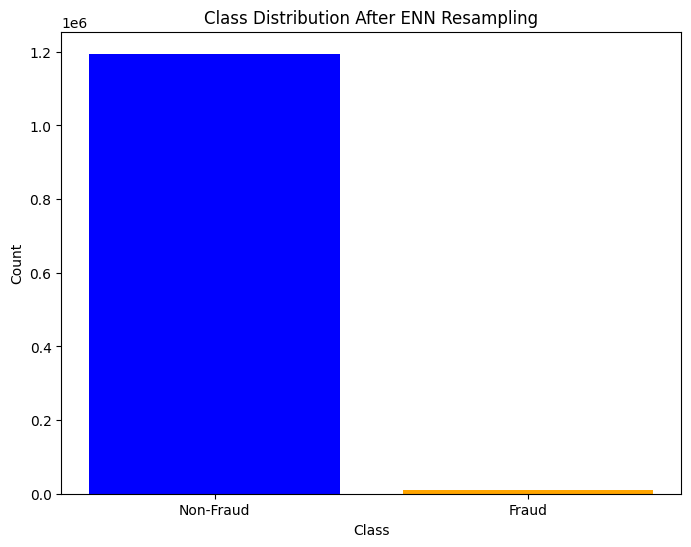

In [56]:

enn = EditedNearestNeighbours()
X_resampled_under, y_resampled_under = enn.fit_resample(X_train_clean, y_train)

class_counts = y_resampled_under.value_counts()
print("After ENN Resampling:")
print(class_counts)

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['blue', 'orange'])
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After ENN Resampling')
plt.show()


Accuracy: 0.9923
F1 Score: 0.3288



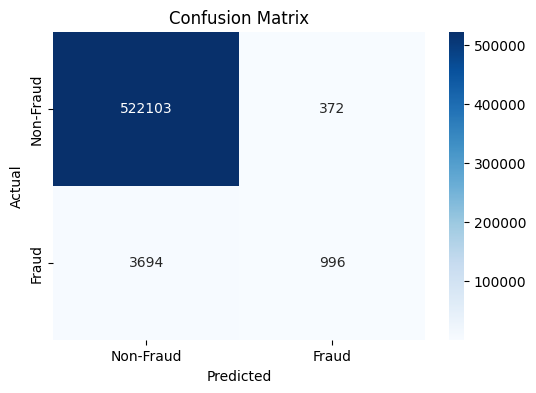


Classification Report:
              precision    recall  f1-score   support

           0     0.9930    0.9993    0.9961    522475
           1     0.7281    0.2124    0.3288      4690

    accuracy                         0.9923    527165
   macro avg     0.8605    0.6058    0.6625    527165
weighted avg     0.9906    0.9923    0.9902    527165



In [57]:

model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_resampled_under, y_resampled_under)

y_pred_under = model.predict(X_test_clean)

acc = accuracy_score(y_test, y_pred_under)
f1 = f1_score(y_test, y_pred_under)

print(f"\nAccuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}\n")

cm = confusion_matrix(y_test, y_pred_under)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_under, digits=4))


# resample 

In [58]:
df = df.sort_values('TX_TIME_DAYS')

split_day = int(df['TX_TIME_DAYS'].max() * 0.7)
train_df = df[df['TX_TIME_DAYS'] <= split_day]
test_df = df[df['TX_TIME_DAYS'] > split_day]

X_train = train_df.drop(['TX_FRAUD', 'TX_FRAUD_SCENARIO'], axis=1)
y_train = train_df['TX_FRAUD']
X_test = test_df.drop(['TX_FRAUD', 'TX_FRAUD_SCENARIO'], axis=1)
y_test = test_df['TX_FRAUD']
